<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Overview</a></span></li></ul></li><li><span><a href="#Tools" data-toc-modified-id="Tools-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tools</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examples</a></span><ul class="toc-item"><li><span><a href="#$d_{\infty}$-Circle-(approximately)" data-toc-modified-id="$d_{\infty}$-Circle-(approximately)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$d_{\infty}$ Circle (approximately)</a></span></li><li><span><a href="#d1---Vitruvian-Man" data-toc-modified-id="d1---Vitruvian-Man-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>d1 - Vitruvian Man</a></span></li><li><span><a href="#d2---Dumbbell" data-toc-modified-id="d2---Dumbbell-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>d2 - Dumbbell</a></span></li><li><span><a href="#d3---Triangle" data-toc-modified-id="d3---Triangle-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>d3 - Triangle</a></span></li><li><span><a href="#d4---Square" data-toc-modified-id="d4---Square-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>d4 - Square</a></span></li><li><span><a href="#d6---Hexagon" data-toc-modified-id="d6---Hexagon-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>d6 - Hexagon</a></span></li><li><span><a href="#c1---Escher's-Pegasus" data-toc-modified-id="c1---Escher's-Pegasus-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>c1 - Escher's Pegasus</a></span></li><li><span><a href="#c1---Waving-Man" data-toc-modified-id="c1---Waving-Man-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>c1 - Waving Man</a></span></li><li><span><a href="#c1---Random-Pattern-(asymmetric)" data-toc-modified-id="c1---Random-Pattern-(asymmetric)-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>c1 - Random Pattern (asymmetric)</a></span></li><li><span><a href="#c2" data-toc-modified-id="c2-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>c2</a></span></li><li><span><a href="#c3" data-toc-modified-id="c3-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>c3</a></span></li><li><span><a href="#c4" data-toc-modified-id="c4-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>c4</a></span></li><li><span><a href="#c6" data-toc-modified-id="c6-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>c6</a></span></li></ul></li></ul></div>

In [1]:
import json
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Overview
-------------

This is **STEP 1** in the design procedure. This worksheet illustrates how you can go about manually creating a motif with different point symmetries.

**You are responsible for correctly identifying/creating the point symmetry.** The Design notebook will perform a numerical check using pymatgen if you have this installed (recommended), but you are responsible for specifying this correctly.

1. Create the (x,y) coordinates.
2. Assign particle types - avoid numbers since these are assigned by the code when constructing a colloid; **use letters** instead.
3. Assign the motif's point symmetry, e.g., "c1".
4. Assign the orientation of the motif as you created it; $\theta$ is regarded as the counterclockwise angle of rotation from the positive x-axis, so when the motif's angle == 0 this corresponds to a *clockwise* rotation of the current image by $\theta$ radians. In other words, the motif is currently being "viewed" at an angle of $\theta$ with respect to the positive x-axis. If a motif has mirror symmetry (i.e., d(n>=1)) then you should **assign the motif's position and orientation such that an angle of 0 will align one of the mirror lines with the x-axis.**  This is required for the code to work correctly! For example if an object has a vertical mirror line (parallel to y-axis) then $\theta = \pi/2$.

Note: objects with cn (rotation but no reflection) symmetry have a chirality; you may also want to explore fitting motifs with both chiralities to see if better matches with a given tile.

# Tools

In [2]:
def export(coords, types, symmetry, theta, filename):
    """
    Export the motif information to a standardized JSON format.
    
    Parameters
    ----------
    coords : array-like
        (x,y) coordinates of motif particles.
    types : array-like
        List of names of each particle's type.
    symmetry : str
        Point symmetry of the motif.
    filename : str
        File to write JSON to.
    """
    assert(len(coords) == len(types))
    data = {
        "symmetry": str(symmetry),
        "coords": np.array(coords, dtype=np.float64).tolist(),
        "types": np.array(types, dtype=str).tolist(),
        "theta": float(theta)
    }
    try:
        open(filename, 'r')
    except IOError:
        json.dump(data, open(filename, 'w'), indent=4, allow_nan=False)
    else:
        raise Exception(filename+" already exists")

In [3]:
def plot(coords, types=None): 
    """Plot the coordinates for easy visualization."""
    if types:
        types = np.array(types)
        plt.figure()
        for i,t in enumerate(np.unique(types)):
            mask = types == t
            plt.plot(coords[mask,0], coords[mask,1], marker='o', lw=0, color='C{}'.format(i))
        _ = plt.gca().axis('equal')
    else:
        coords = np.array(coords)
        plt.plot(coords[:,0], coords[:,1], 'o')
        plt.gca().axis('equal') 
    
def rotate(theta):
    """Counterclockwise rotation matrix."""
    R = np.array(
        [
            [np.cos(theta), -np.sin(theta)], 
            [np.sin(theta), np.cos(theta)]
        ]
    )
    return R

def swirl(n, k=10):
    """Create an n-armed 'swirl' with n-fold rotation symmetry."""
    theta = np.linspace(0, np.pi, k)
    x = np.cos(theta)
    y = np.sin(theta)

    arm = np.array([(a,b) for a,b in zip(x,y)])

    coords = arm - arm[-1]
    for i in range(1, n):
        coords = np.vstack((coords, np.matmul(rotate(2*np.pi*i/n), (arm - arm[-1]).T).T[:-1]))
    return coords

def swap_chirality(coords):
    """Change the chirality of a set of points."""
    com = np.mean(coords, axis=0)
    centered = coords - com # Center
    centered[:,1] = -centered[:,1] # Reflect across y-axis
    return centered + com

def compress(coords): 
    """Compress into [0,1] square window to make it easier on Tactile."""
    compressed = copy.copy(coords)
    bb = np.min(compressed, axis=0)
    compressed -= bb

    bb = np.max(compressed, axis=0)
    compressed = compressed/bb
    
    return compressed

# Examples

## $d_{\infty}$ Circle (approximately)

In [4]:
N = 20 # < inf
x = [np.cos(2*np.pi/N*i)*0.5 for i in range(0, N)]
y = [np.sin(2*np.pi/N*i)*0.5 for i in range(0, N)]
coords = np.vstack((x,y)).T

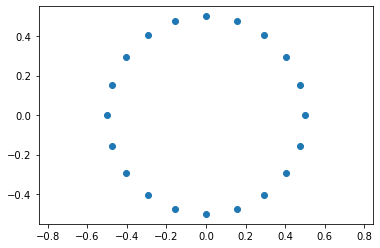

In [5]:
plot(coords)

In [6]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="dinf",
    theta=0.0,
    filename="dinf_circle.json"
)

## d1 - Vitruvian Man

In [7]:
coords = [
    [0, 0],
    [0, -1],
    [-1, -1],
    [-2, -1],
    [-2, -2],
    [1, -1],
    [2, -1],
    [2, -2],
    [0, -2],
    [0, -3],
    [-1, -3],
    [-1, -4],
    [1, -3],
    [1, -4]
]

coords = compress(np.array(coords))

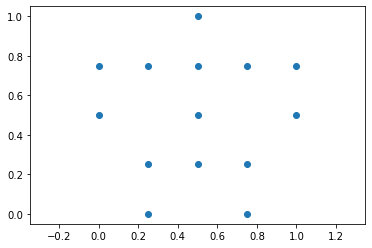

In [8]:
plot(coords)

In [9]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="d1",
    theta=np.pi/2., # Mirror line is vertical
    filename="d1_vitruvian.json"
)

## d2 - Dumbbell

In [10]:
N = 10 # Needs to be even
r = 0.25
x = [np.cos(2*np.pi/N*i)*r - r for i in range(0, N)]
y = [np.sin(2*np.pi/N*i)*r for i in range(0, N)]
coords = np.vstack((x,y)).T
coords = np.vstack((coords, coords + [2.1*r, 0]))

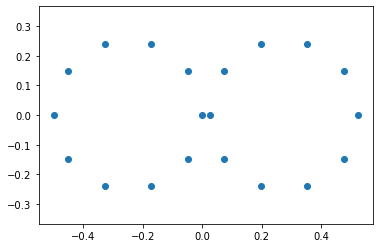

In [11]:
plot(coords)

In [12]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="d2",
    theta=0.0, # A mirror line coincides with the x-axis
    filename="d2_dumbbell.json"
)

## d3 - Triangle

In [13]:
N = 10
l1 = np.array(list(zip(np.linspace(0, 1, N), [0]*N)))
l2 = np.matmul(rotate(np.pi/3.), l1.T).T
l3 = np.matmul(rotate(-np.pi/3.), l1.T).T + np.array([1/2., np.sqrt(3.0)/2.*1])
coords = np.vstack((l1[:-1,:], l2[1:,:], l3[1:,:]))

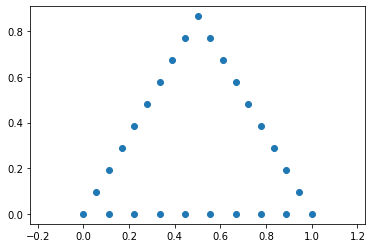

In [14]:
plot(coords)

In [15]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="d3",
    theta=np.pi/6., # Mirror line is inclined
    filename="d3_triangle.json"
)

## d4 - Square

In [16]:
N = 10
l1 = np.array(list(zip(np.linspace(0, 1, N), [0]*N)))
l2 = np.matmul(rotate(np.pi/2.), l1.T).T
l3 = l1 + np.array([0, 1])
l4 = copy.copy(l2) + np.array([1, 0])

coords = compress(np.vstack((l1, l2[1:], l3[1:], l4[1:-1,:])))

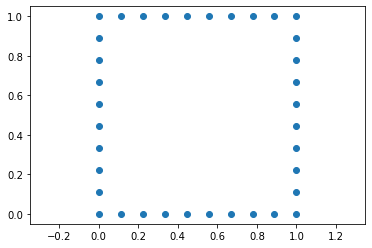

In [17]:
plot(coords)

In [18]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="d4",
    theta=0.0, # Mirror line along x-axis
    filename="d4_square.json"
)

## d6 - Hexagon

In [19]:
N = 10
l1 = np.array(list(zip(np.linspace(0, 1, N), [0]*N)))
l2 = np.matmul(rotate(-2*np.pi/3.), l1.T).T
l3 = np.matmul(rotate(-4*np.pi/3.), l1.T).T
l3 += (l2[-1] - l3[-1])
l4 = copy.copy(l1) + l3[0]
l5 = np.matmul(np.array([[-1, 0],[0, 1]]), l3.T).T + np.array([1.0, 0])
l6 = np.matmul(np.array([[-1, 0],[0, 1]]), l2.T).T + np.array([1.0, 0])

coords = np.vstack((l1[1:], l2[:-1], l3[1:], l4[:-1], l5[:-1], l6[1:]))
coords -= np.array([0, np.min(coords[:,1])])

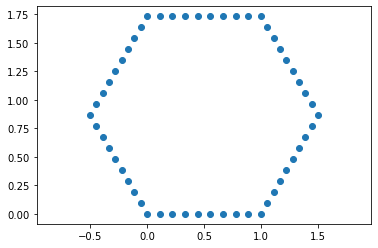

In [20]:
plot(coords)

In [21]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="d6",
    theta=0.0, # Mirror line along x-axis
    filename="d6_hexagon.json"
)

## c1 - Escher's Pegasus

In [22]:
# Manually drawn in Inkscape
coords = [
    [145, 90],
    [155, 87],
    [164, 91],
    [156, 106],
    [164, 108],
    [174, 99],
    [182, 96],
    [176, 106],
    [170, 106],
    [169, 112],
    [173, 116],
    [179, 114],
    [173, 116], # Go back
    [169, 127],
    [162, 134],
    [169, 127], # Go back
    [164, 117],
    [152, 115],
    [144, 118],
    [143, 124],
    [144, 118], # Go back
    [152, 115], # Go back
    [148, 109],
    [142, 109],
    [143, 114],
    [157, 94],
    [149, 94],
]

coords = np.array(coords)
coords[:,1] = 300 - coords[:,1] # Coords start from top left

coords = compress(np.array(coords))

In [23]:
# Interpolate to increase the point density
n = 3
new_coords = []
for i in range(coords.shape[0]):
    lp = coords[i]
    rp = coords[(i+1)%coords.shape[0]]
    dx = (rp[0] - lp[0])/n
    dy = (rp[1] - lp[1])/n
    
    new_coords.append(lp)
    for i in range(1, n):
        new_coords.append([lp[0]+dx*i, lp[1]+dy*i])
        
# Remove duplicates
unique_points = []
tol = 1.0e-8
for i in range(len(new_coords)):
    skip = False
    for j in range(i+1, len(new_coords)):
        d2 = (new_coords[j][0] - new_coords[i][0])**2 + (new_coords[j][1] - new_coords[i][1])**2
        if (d2 < tol*tol):
            skip = True
            break
    if not skip:
        unique_points.append(new_coords[i])

In [24]:
unique_points = np.array(unique_points)

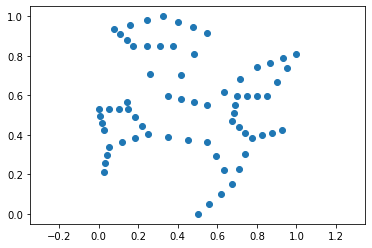

In [25]:
plot(unique_points)

In [26]:
export(
    coords=unique_points, 
    types=['A']*len(unique_points), 
    symmetry="c1",
    theta=0.0,
    filename="c1_pegasus.json"
)

## c1 - Waving Man

In [27]:
coords = [
    [0, 0],
    [0, -1],
    [-1, -1],
    [-2, -1],
    [-2, 0],
    [1, -1],
    [2, -1],
    [2, -2],
    [0, -2],
    [0, -3],
    [-1, -3],
    [-1, -4],
    [1, -3],
    [1, -4]
]

coords = compress(np.array(coords))

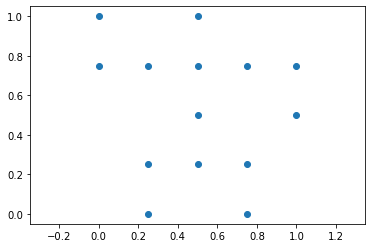

In [28]:
plot(coords)

In [29]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="c1",
    theta=0.0, 
    filename="c1_waving.json"
)

## c1 - Random Pattern (asymmetric)

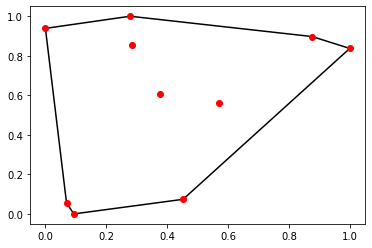

In [30]:
# Create a shape from a convex hull of random points

np.random.seed(0)
N = 10
coords = np.array(list(zip(np.random.random(N), np.random.random(N))))
types = ['A']*len(coords)

coords = compress(coords)

from scipy.spatial import ConvexHull
h = ConvexHull(coords)
for simplex in h.simplices:
    plt.plot(coords[simplex, 0], coords[simplex, 1], 'k-')
plt.plot(coords[:,0], coords[:,1], 'ro')

In [31]:
# Interpolate along vertices to densify the boundary
points = None
N = 5
for simplex in h.simplices:
    dx, dy = coords[simplex, 0], coords[simplex, 1]
    x = np.linspace(dx[0], dx[1], N)
    y = np.linspace(dy[0], dy[1], N)
    new_points = np.array(list(zip(x,y)))
    if points is None:
        points = new_points
    else:
        points = np.vstack((points, new_points))

In [32]:
coords = np.unique(points, axis=0)

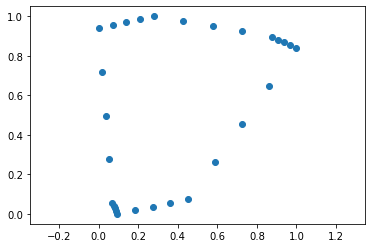

In [33]:
plot(coords)

In [34]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="c1",
    theta=0.0,
    filename="c1_random.json"
)

## c2

In [35]:
theta = np.linspace(0, 2*np.pi, 20-1)
x = np.cos(theta)
y = np.sin(theta)

z = np.linspace(0.95, -0.95, 20-1)
scale = 0.5

#coords = np.array([(a,b) for a,b in zip(x,y)])
#coords = np.vstack((coords, np.array([(a,b) for a,b in zip(scale*y,z)])))

coords = np.array([(a,b) for a,b in zip(scale*y,z)])

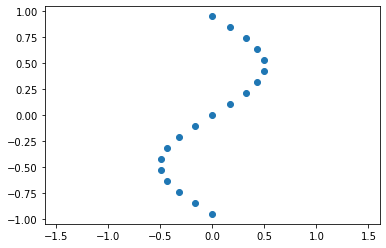

In [36]:
plot(coords)

In [37]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="c2",
    theta=0.0,
    filename="c2_taiji.json"
)

## c3

In [38]:
coords = swirl(3)

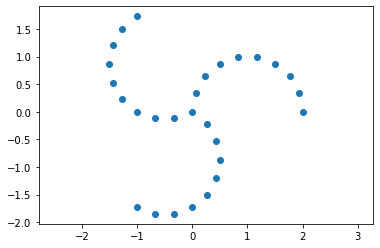

In [39]:
plot(coords)

In [40]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="c3",
    theta=0.0,
    filename="c3_swirl.json"
)

In [41]:
N = 15
l1 = np.array(list(zip(np.linspace(0, 1.4, N), [0]*N)))
l2 = np.matmul(rotate(np.pi/3.), l1.T).T - np.array([0.5*np.cos(np.pi/3.), 0.5*np.sin(np.pi/3.)])
l3 = np.matmul(rotate(-np.pi/3.), l1.T).T + np.array([1/2.*1.5-0.5, np.sqrt(3.0)/2.*1*1.5])
coords = np.vstack((l1[1:,:], l2[1:,:], l3[1:,:]))

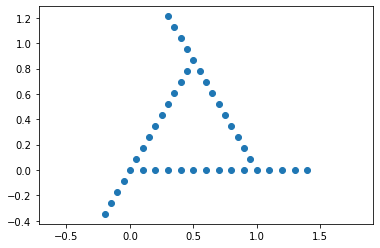

In [42]:
plot(coords)

In [43]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="c3",
    theta=0.0,
    filename="c3_triangle.json"
)

## c4

In [44]:
coords = swirl(4)

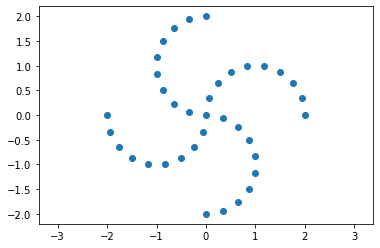

In [45]:
plot(coords)

In [46]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="c4",
    theta=0.0,
    filename="c4_swirl.json"
)

## c6

In [47]:
coords = swirl(6)

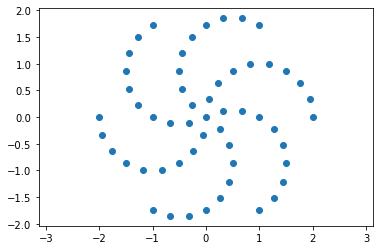

In [48]:
plot(coords)

In [49]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="c6",
    theta=0.0,
    filename="c6_swirl_L.json"
)

In [50]:
coords = swap_chirality(coords)

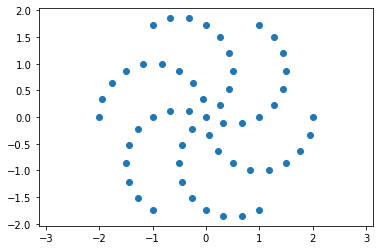

In [51]:
plot(coords)

In [52]:
export(
    coords=coords, 
    types=['A']*len(coords), 
    symmetry="c6",
    theta=0.0,
    filename="c6_swirl_D.json"
)